In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
from io import StringIO
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import metrics

In [2]:
hospital_df = pd.read_csv("hospitals_infections.csv")
hospital_df.head()

,provider_id,hospital_ownership,emergency_services,cpcd,pecd,hsbp,readmission,c_diff_compared
0,40055,Proprietary,Yes,95.00,33,1.07,16,Better than the U.S. National Benchmark
1,40062,Voluntary non-profit - Private,Yes,46.67,32,1.04,14,Better than the U.S. National Benchmark
2,40084,Voluntary non-profit - Private,Yes,46.36,65,0.93,18,Better than the U.S. National Benchmark
3,40134,Proprietary,Yes,95.83,83,0.90,16,Better than the U.S. National Benchmark
4,50022,Government - State,Yes,71.67,14,1.05,16,Worse than the U.S. National Benchmark


In [3]:
hospital_df.dtypes

provider_id             int64
hospital_ownership     object
emergency_services     object
cpcd                  float64
pecd                    int64
hsbp                  float64
readmission             int64
c_diff_compared        object
dtype: object

## Data wrangling

In [4]:
hospital_df.isnull().sum()

provider_id           0
hospital_ownership    0
emergency_services    0
cpcd                  0
pecd                  0
hsbp                  0
readmission           0
c_diff_compared       0
dtype: int64

In [5]:
hospital_df["c_diff_compared"] = hospital_df["c_diff_compared"].replace({'Better than the U.S. National Benchmark': 1, 'Worse than the U.S. National Benchmark': 0})

In [6]:
hospital_df.head()

,provider_id,hospital_ownership,emergency_services,cpcd,pecd,hsbp,readmission,c_diff_compared
0,40055,Proprietary,Yes,95.00,33,1.07,16,1
1,40062,Voluntary non-profit - Private,Yes,46.67,32,1.04,14,1
2,40084,Voluntary non-profit - Private,Yes,46.36,65,0.93,18,1
3,40134,Proprietary,Yes,95.83,83,0.90,16,1
4,50022,Government - State,Yes,71.67,14,1.05,16,0


## Split the Dataset

In [7]:
list_features = ['hospital_ownership', 'emergency_services', 'cpcd', 'pecd', 'hsbp', 'readmission']
x = hospital_df[list_features]
y = hospital_df['c_diff_compared']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=7)

# Part I
## • Investigate a supervised learning classifier (not reviewed in lectures). It can be an algorithm your group will use in the final project.

Use SVM to train the module and classify the result.

SVM reference : https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

Deal with string features in SVM : https://stackoverflow.com/questions/51552438/categorical-string-features-in-sklearn-for-10cv-svm-regression

In [8]:
clf = svm.SVC()
encode_train = pd.get_dummies(x_train, drop_first=True)
clf.fit(encode_train, y_train)

SVC()

In [9]:
encode_test = pd.get_dummies(x_test, drop_first=True)
y_pred = clf.predict(encode_test)

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Precision: 0.7381974248927039
Recall: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.74      1.00      0.85       172

    accuracy                           0.74       233
   macro avg       0.37      0.50      0.42       233
weighted avg       0.54      0.74      0.63       233



/Users/yachiru/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yachiru/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yachiru/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We get a precision of 74% and recall of 100%, which are considered as good values.

## • Identify the advantages and disadvantages of the selected classifier.

Advantages:
1. SVM can be used in high-dimentional spaces
2. SVM can be used in cache, which is faster

Disadvantages:
1. If the number of features is lager than the number of samples, SVM has a poor performance

## • Construct a model in either R or Python to investigate the relationship between US acute-care hospital characteristics and Clostridium difficile infections (CDI). Use the dataset hospitals_infections.csv.

Use Decision Trees to explore relationship between US acute-care hospital characteristics and Clostridium difficile infections (CDI)

### Encode Variables and Train the Model

In [10]:
model = DecisionTreeClassifier()
encode_train = pd.get_dummies(x_train, drop_first=True)
model.fit(encode_train, y_train)

DecisionTreeClassifier()

In [11]:
encode_train.columns 

Index(['cpcd', 'pecd', 'hsbp', 'readmission',
       'hospital_ownership_Government - Hospital District or Authority',
       'hospital_ownership_Government - Local',
       'hospital_ownership_Government - State', 'hospital_ownership_Physician',
       'hospital_ownership_Proprietary',
       'hospital_ownership_Voluntary non-profit - Church',
       'hospital_ownership_Voluntary non-profit - Other',
       'hospital_ownership_Voluntary non-profit - Private',
       'emergency_services_Yes'],
      dtype='object')

In [12]:
encode_list = ['cpcd', 'pecd', 'hsbp', 'readmission',
       'hospital_ownership_Government - Hospital District or Authority',
       'hospital_ownership_Government - Local',
       'hospital_ownership_Government - State', 'hospital_ownership_Physician',
       'hospital_ownership_Proprietary',
       'hospital_ownership_Voluntary non-profit - Church',
       'hospital_ownership_Voluntary non-profit - Other',
       'hospital_ownership_Voluntary non-profit - Private',
       'emergency_services_Yes']

### Visualization of Decision Tree 

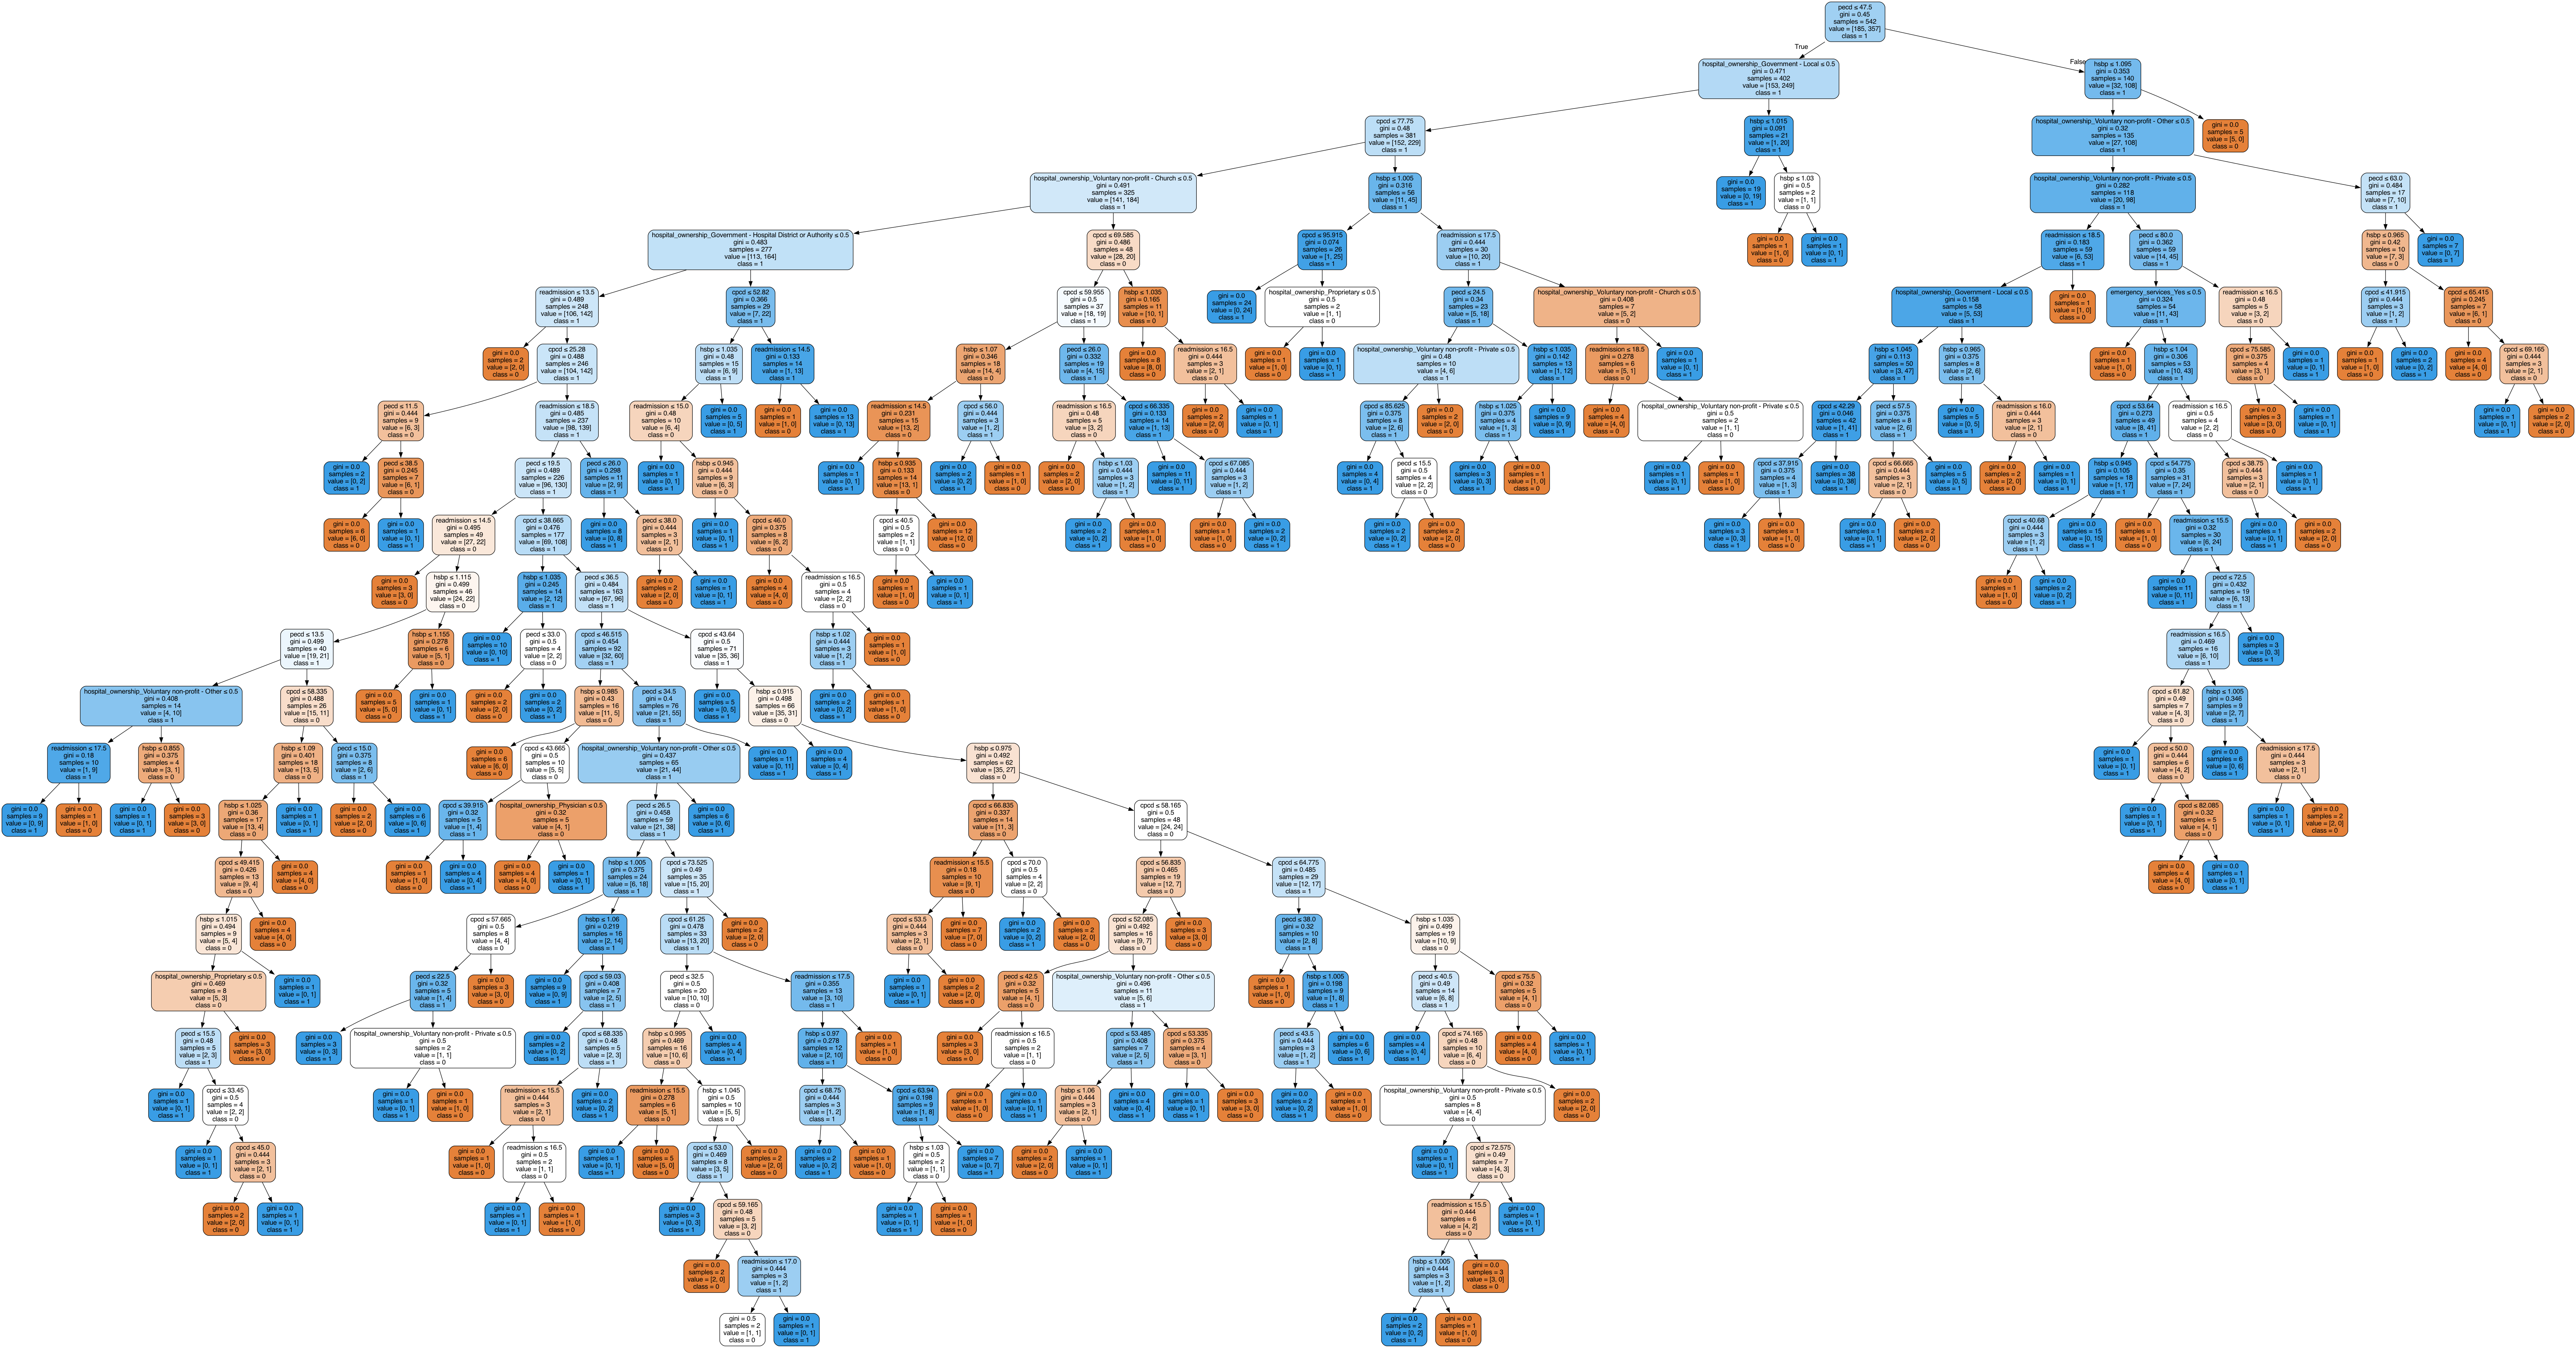

In [13]:
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded = True, special_characters= True, 
                feature_names = encode_list, class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Evaluate the model. 

In [14]:
encode_test = pd.get_dummies(x_test, drop_first=True)
y_pred = model.predict(encode_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6051502145922747
              precision    recall  f1-score   support

           0       0.30      0.39      0.34        61
           1       0.76      0.68      0.72       172

    accuracy                           0.61       233
   macro avg       0.53      0.54      0.53       233
weighted avg       0.64      0.61      0.62       233



The accuracy_score of the module is 0.6051502145922747, which is good. 

Precision and recall for label 0 is 0.30 and 0.39. Precision and recall for label 1 is 0.76 and 0.68. Those results can be furthure improved.

f1-score for label 0 and 1 is 0.34(kind of low) and 0.72(good).